In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
input_file = '/home/robertb/Dropbox/Data/MachineLearning/student-mat.csv'
df = pd.read_csv(input_file,header=0,sep=';')
headers = list(df.columns.values)
df=df._get_numeric_data()
numeric_headers = list(df.columns.values)
numpy_array = df.as_matrix()
Y = df.as_matrix(columns=['absences'])
X = df.as_matrix(columns=['Walc', 'Dalc'])
numeric_headers.reverse()
reverse_df=df[numeric_headers]

print numeric_headers
#print Y

clf=linear_model.ElasticNet()

print 'Now Fitting...' 
clf.fit(X,Y)

testList=[(0,0),(1,1),(2,2),(3,3),(4,4),(5,5)]

for aList in testList:
    newX = np.array(aList)
    print 'Predicting absences as function of X(Weekly and Daily alc consumption) set as: '+str(newX)+' ...'
    print clf.predict(newX.reshape(1,-1))


['G3', 'G2', 'G1', 'absences', 'health', 'Walc', 'Dalc', 'goout', 'freetime', 'famrel', 'failures', 'studytime', 'traveltime', 'Fedu', 'Medu', 'age']
Now Fitting...
len of uniques:  1
Predicting absences as function of X(Weekly and Daily alc consumption) set as: [0 0] ...
[ 4.75047783]
Predicting absences as function of X(Weekly and Daily alc consumption) set as: [1 1] ...
[ 5.16877756]
Predicting absences as function of X(Weekly and Daily alc consumption) set as: [2 2] ...
[ 5.58707729]
Predicting absences as function of X(Weekly and Daily alc consumption) set as: [3 3] ...
[ 6.00537702]
Predicting absences as function of X(Weekly and Daily alc consumption) set as: [4 4] ...
[ 6.42367675]
Predicting absences as function of X(Weekly and Daily alc consumption) set as: [5 5] ...
[ 6.84197648]


In [5]:
Y = df.as_matrix(columns=['absences'])
X = df.as_matrix(columns=['health', 'Walc', 'Dalc',])
clf=linear_model.ElasticNet()

print 'Now Fitting...' 
clf.fit(X,Y)

testList=[(0,0,0),(1,1,1),(1,3,3),(3,3,3),(5,3,3),(5,5,5),(0,5,5,),(1,5,5)]

for aList in testList:
    newX = np.array(aList)
    print 'Predicting absences with X(Health, Weekly and Daily alc consumption) set as: '+str(newX)+' ...'
    print clf.predict(newX.reshape(1,-1))


Now Fitting...
len of uniques:  1
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [0 0 0] ...
[ 4.75047783]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [1 1 1] ...
[ 5.16877756]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [1 3 3] ...
[ 6.00537702]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [3 3 3] ...
[ 6.00537702]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [5 3 3] ...
[ 6.00537702]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [5 5 5] ...
[ 6.84197648]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [0 5 5] ...
[ 6.84197648]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [1 5 5] ...
[ 6.84197648]


In [26]:
Y = df.as_matrix(columns=['absences'])
X = df.as_matrix(columns=['health', 'Walc', 'Dalc','goout','freetime','age'])
clf=linear_model.ElasticNet()

print 'Now Fitting...' 
clf.fit(X,Y)
print (clf.score(X,Y))

testList=[(0,5,5,5,5,21),(0,5,5,5,5,18),(0,5,5,1,1,21),(3,3,3,3,3,15),(3,3,3,3,3,21),(0,5,5,5,5,15),
          (0,5,5,1,1,18),(0,5,5,3,3,21)]

for aList in testList:
    newX = np.array(aList)
    print 'Predicting absences with X(Health, Weekly and Daily alc consumption) set as: '+str(newX)+' ...'
    print clf.predict(newX.reshape(1,-1))

Now Fitting...
len of uniques:  1
len of uniques:  1
0.0355504970443
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 0  5  5  5  5 21] ...
[ 9.11830829]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 0  5  5  5  5 18] ...
[ 7.40306941]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 0  5  5  1  1 21] ...
[ 9.23927295]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 3  3  3  3  3 15] ...
[ 5.00842283]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 3  3  3  3  3 21] ...
[ 8.43890058]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 0  5  5  5  5 15] ...
[ 5.68783054]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 0  5  5  1  1 18] ...
[ 7.52403407]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 0  5  5  3  3 21] ...
[ 9.17879062]


In [27]:
#generate sample data
n_samples_train, n_samples_test, n_features = 200, 150, 5
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = Y[:n_samples_train], Y[n_samples_train:]

###############################################################################
# Compute train and test errors
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, Y).coef_
coef = Y

len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniques:  1
len of uniqu

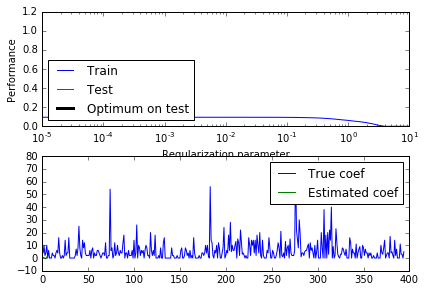

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()

In [33]:
testList=[(1,1,1,1,1,21),(2,2,2,2,2,21),(1,3,3,3,3,21),(3,3,3,3,3,21),(5,3,3,3,3,21),
          (5,1,1,5,5,21),(1,5,5,1,1,21),(0,5,5,3,3,21)]

for aList in testList:
    newX = np.array(aList)
    print 'Predicting absences with X(Health, Weekly and Daily alc consumption) set as: '+str(newX)+' ...'
    print clf.predict(newX.reshape(1,-1))

Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 1  1  1  1  1 21] ...
[ 7.75949287]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 2  2  2  2  2 21] ...
[ 8.09919673]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 1  3  3  3  3 21] ...
[ 8.43890058]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 3  3  3  3  3 21] ...
[ 8.43890058]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 5  3  3  3  3 21] ...
[ 8.43890058]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 5  1  1  5  5 21] ...
[ 7.63852822]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 1  5  5  1  1 21] ...
[ 9.23927295]
Predicting absences with X(Health, Weekly and Daily alc consumption) set as: [ 0  5  5  3  3 21] ...
[ 9.17879062]


In [49]:
Y_predict=np.ndarray(shape=(195,1))
for xrow in X_test:
    result=clf.predict(xrow)
    np.append(Y_predict,float(result))
from sklearn.metrics import matthews_corrcoef
print y_test.shape,Y_predict.shape
print matthews_corrcoef(y_test,Y_predict)

(195, 1) (195, 1)
len of uniques:  1


/home/robertb/vSCIKIT/lib/python2.7/site-packages/sklearn/utils/validation.py:387: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/robertb/vSCIKIT/lib/python2.7/site-packages/sklearn/utils/validation.py:387: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/robertb/vSCIKIT/lib/python2.7/site-packages/sklearn/utils/validation.py:387: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

ValueError: Can't handle mix of multiclass and continuous